In [1]:
import torch
import torch_geometric
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt

/home/zk/program/github/my/myplan3/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## build graph from exploration 
### use pretrained exploration model to inference the nodes and edges

In [3]:
# the positions are recorded in the nodes.txt

nodes_list=[]

with open("nodes.txt", "r") as f:
    lines=f.readlines()
    for line in lines:
        items=line.strip("\n ").split(";")
        for item in items[:-1]:
            x, y=item.split(",")
            nodes_list.append([float(x), float(y)])

print(len(nodes_list))

1000


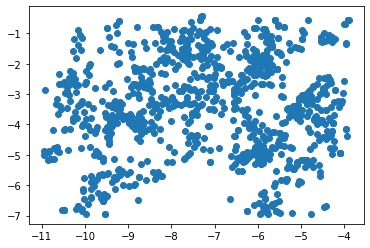

In [5]:
import matplotlib.pyplot as plt
import numpy as np

nodes_array=np.array(nodes_list)
plt.scatter(nodes_array[:,0], nodes_array[:,1])
plt.show()

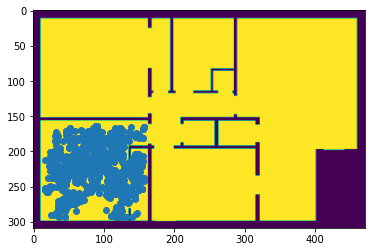

In [7]:
import cv2

image=cv2.imread("floor_plan_simple.png",0)

# show the points in the binary images
def convert_pos_to_imagepos_array(robot_pos_array):
    grid_size=0.05
    cx, cy=235.5,154.5
    image_pos_array=robot_pos_array.copy()
    image_pos_array[:,0]=robot_pos_array[:,0]/grid_size+cx
    image_pos_array[:,1]=-robot_pos_array[:,1]/grid_size+cy
    return image_pos_array

image_pos_array=convert_pos_to_imagepos_array(nodes_array)

plt.imshow(image)
plt.scatter(image_pos_array[:,0], image_pos_array[:,1])
plt.show()